# Fyrirlestraræfing 5, fim. 7. febrúar 2018
Þessi æfing snýst um teikningu með Matplotlib. Byrjið á að nústilla með því að keyra næsta reit.

In [4]:
#BYRJA -- Keyrið til að frumstilla numpy o.fl.
import numpy as np, numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as st, scipy.optimize as opt

plt.rc('axes', axisbelow=True)
%matplotlib inline
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)

## F1. Bestun
Rifjum upp jöfnu bestu línu, þar sem summa frávika í öðru veldi er:

$$ \label{e1}
S(a,b) = \sum_{i=1}^{n}(aX_i + b - Y_i)^2
$$

(notum $X$ og $Y$ í stað $x$ og $y$ því við þurfum $x$ í annað). 

Hér er sá partur úr lausninni á Tímadæmum 4 sem þarf til að búa til punktasafn (X,Y) til að nota:

In [7]:
npr.seed(10)

def slembixy(n):
    """skilar (x,y), hermdum punktum til að finna jöfnu bestu línu"""
    x = 1 + 5*npr.random(n)
    e = 0.7*npr.normal(size=n)
    y = 1.5*x + 0.3 + e
    return x,y

def d(a,b,x,y):
    """Kvaðratsumma frávika milli a*x + b og y"""
    n = len(x)
    return  sum((a*x + b - y)**2)

n = 50
X,Y = slembixy(n)

Hér er svo sá partur sem þarf til skilgreina S og fylkið Z sem er notað í hæðarlínuteikningu þess (með smá breytingu, aðallega að nú verður $b$ á x-ás og $a$ á y-ás, en líka að `U` og `V` koma í stað `u` og `v`):

    def S(a,b):
        """Kvaðratsumma frávika milli a*X + b og Y"""
        return d(a, b, X, Y)
        
    U = np.linspace(-1, 2)
    V = np.linspace(1, 2)

    nu = len(U)
    nv = len(V)
    Z = np.zeros((nu,nv))
    for i in range(nu):
        for j in range(nv):
            Z[i,j] = S(v[i], u[j])
    
### F5.1  Einföldun á skilgreiningu S
Byrjum á að nota *comprehension* (*yfirgrip*) til að einfalda skilgreiningu Z. 
Hér er dæmi sem býr til fylki með $a_{ij} = i+j, i = 0,...,2, j = 0, 1$:

In [8]:
I = [0,1,2]; J = [0,1]
A = np.array([[i + j for i in I] for j in J]); A

array([[0, 1, 2],
       [1, 2, 3]])

Horfið eftir þessu dæmi til að einfalda útreikning Z, með því að breyta næsta reit 
(það er hægt að sleppa við að skilgreina `nu` og `nv` og reyndar þarf
bara eina línu í stað síðustu 6):

In [9]:
def S(a,b):
    """Kvaðratsumma frávika milli a*X + b og Y"""
    return d(a, b, X, Y)

U = np.linspace(-1, 2)
V = np.linspace(1, 2)

nu = len(U)
nv = len(V)
Z = np.zeros((nu,nv))
for i in range(nu):
    for j in range(nv):
        Z[i,j] = S(V[i], U[j])

Hér er svo reitur sem teiknar:

Text(0, 0.5, 'hallatala, b')

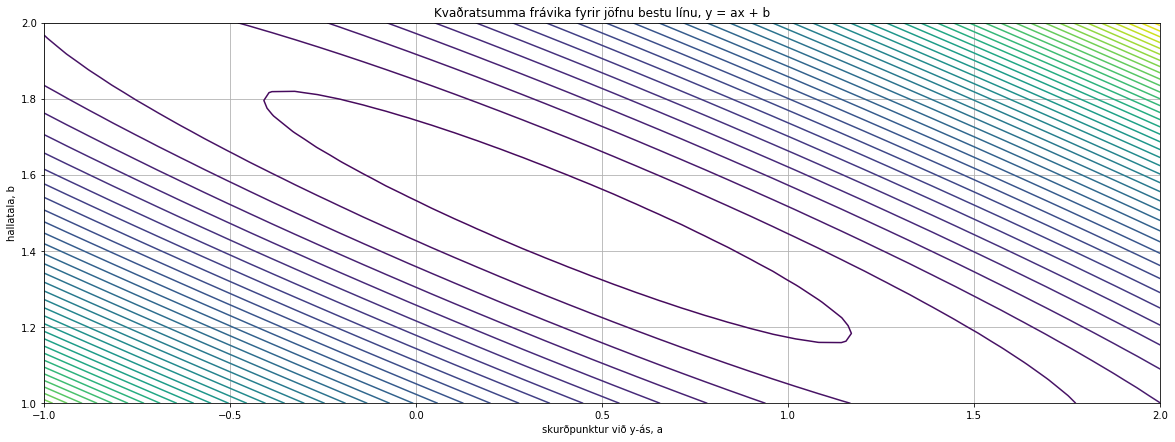

In [10]:
plt.figure(figsize = (20,7))
plt.contour(U, V, Z.T, 40)
plt.grid();
plt.title('Kvaðratsumma frávika fyrir jöfnu bestu línu, y = ax + b')
plt.xlabel('skurðpunktur við y-ás, a')
plt.ylabel('hallatala, b')

### F5.2  Lágmörkun
Næst ætlum við að prófa bestunarpakkann í Scipy sem er fluttur inn sem `opt` í byrjunarreitnum. 
Skoðum fall Rosenbrocks:

$$
f(x_0, x_1) = (1 - x_0)^2 + 100(x_1 - x_0^2)^2
$$

a) Skrifið Python-fall sem tekur inn tveggja staka vigur `x` og skilar fallsgildi Rosenbrock-fallsins þar.

Eitt aðalfallið í bestunarpakkanum er `opt.minimize`. Það tekur inn tvo skyldustika `fall` til að lágmarka
og byrjunarpunkt `x0` fyrir lágmörkunarreikniritið. Það skilar `result` sem hægt er að prenta út
til að fá upplýsingar um hvernig til tókst, og inniheldur m.a. `result.x` með lausninni ef hún fannst.

b) Lágmarkið fall Rosenbrocks.

c) Lágmarkið fallið S (það þarf að breyta því þannig að það taki inn vigur x = [b, a], skoðum það betur í fyrirlestri)

In [11]:
#print(x)
def rosen(x):
    a = (1 - x[0])**2
    b = x[1]-x[0]**2
    return a + 100*b**2
    
x0 = np.zeros(2)
result = opt.minimize(rosen,x0)
print(result)

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49, 0.99],
       [0.99, 1.98]])
      jac: array([ 0.00, -0.00])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([1.00, 1.00])
